# LINEAR REGRESSION MODEL

**Motivación del estudio:**

Based on the physiological data of its customers what will be the premium (coste/tarifa) to be paid by each of them?

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**EDA of the data**

First steps, lets get an understanding of the dataset

In [178]:
import pandas as pd

raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [179]:
raw_data.shape

(1338, 7)

In [180]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Once we have obtained this information, it is important that we are able to extract some conclusions:

- There are a total of 1338 rows (in this case, physiological data of people/clients) and 6 columns, among which we find the target or class to predict, 'charges'.

- Luckily, is a very good and complete dataset and it has no null values.

- The data has 4 numerical characteristics: age, bmi, children, charges.

- The data has 3 categorical characteristics: sex, smoker, region.

1. Eliminate duplicates.

Let's do a control of how many duplicates can be found in the dataset:

In [181]:
raw_data.duplicated().sum()

np.int64(1)

There's 1 duplicate value.

Will try to select the duplicates to obtain some more info:

In [182]:
duplicates = raw_data[raw_data.duplicated(keep=False)]

# Display the duplicated rows:
duplicates

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Given the coincidence of the data, will assume these rows reffer to the same client so they are duplicates and will be eliminated.

In [183]:
data_no_duplicates = raw_data.drop_duplicates().reset_index(drop = True)
data_no_duplicates.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


No duplicates have been found now. Good news 👍

**Eliminate irrelevant information:**

In this case, and given all the variables give important information, we'll keep them all.

**Analysis of univariate variables:**

Analysis of categorical variables

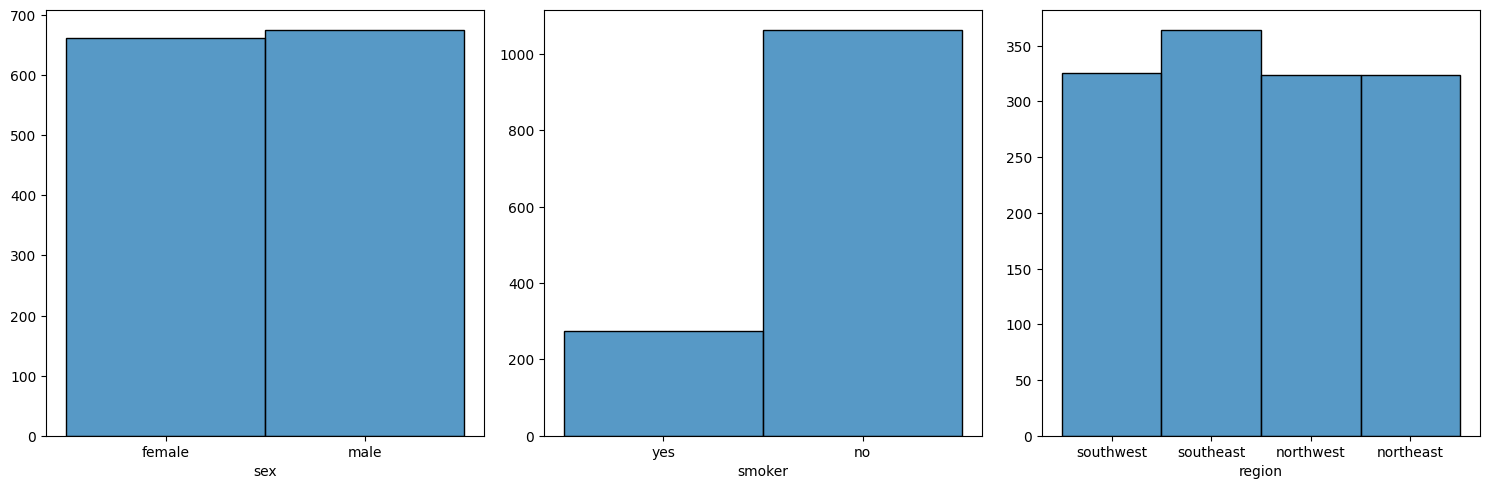

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Plotting categorical variables
sns.histplot(ax=axis[0], data=data_no_duplicates, x="sex").set(ylabel=None)
sns.histplot(ax=axis[1], data=data_no_duplicates, x="smoker").set(ylabel=None)
sns.histplot(ax=axis[2], data=data_no_duplicates, x="region").set(ylabel=None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()




Very homogeneus data samples.

Analysis of numerical variables:

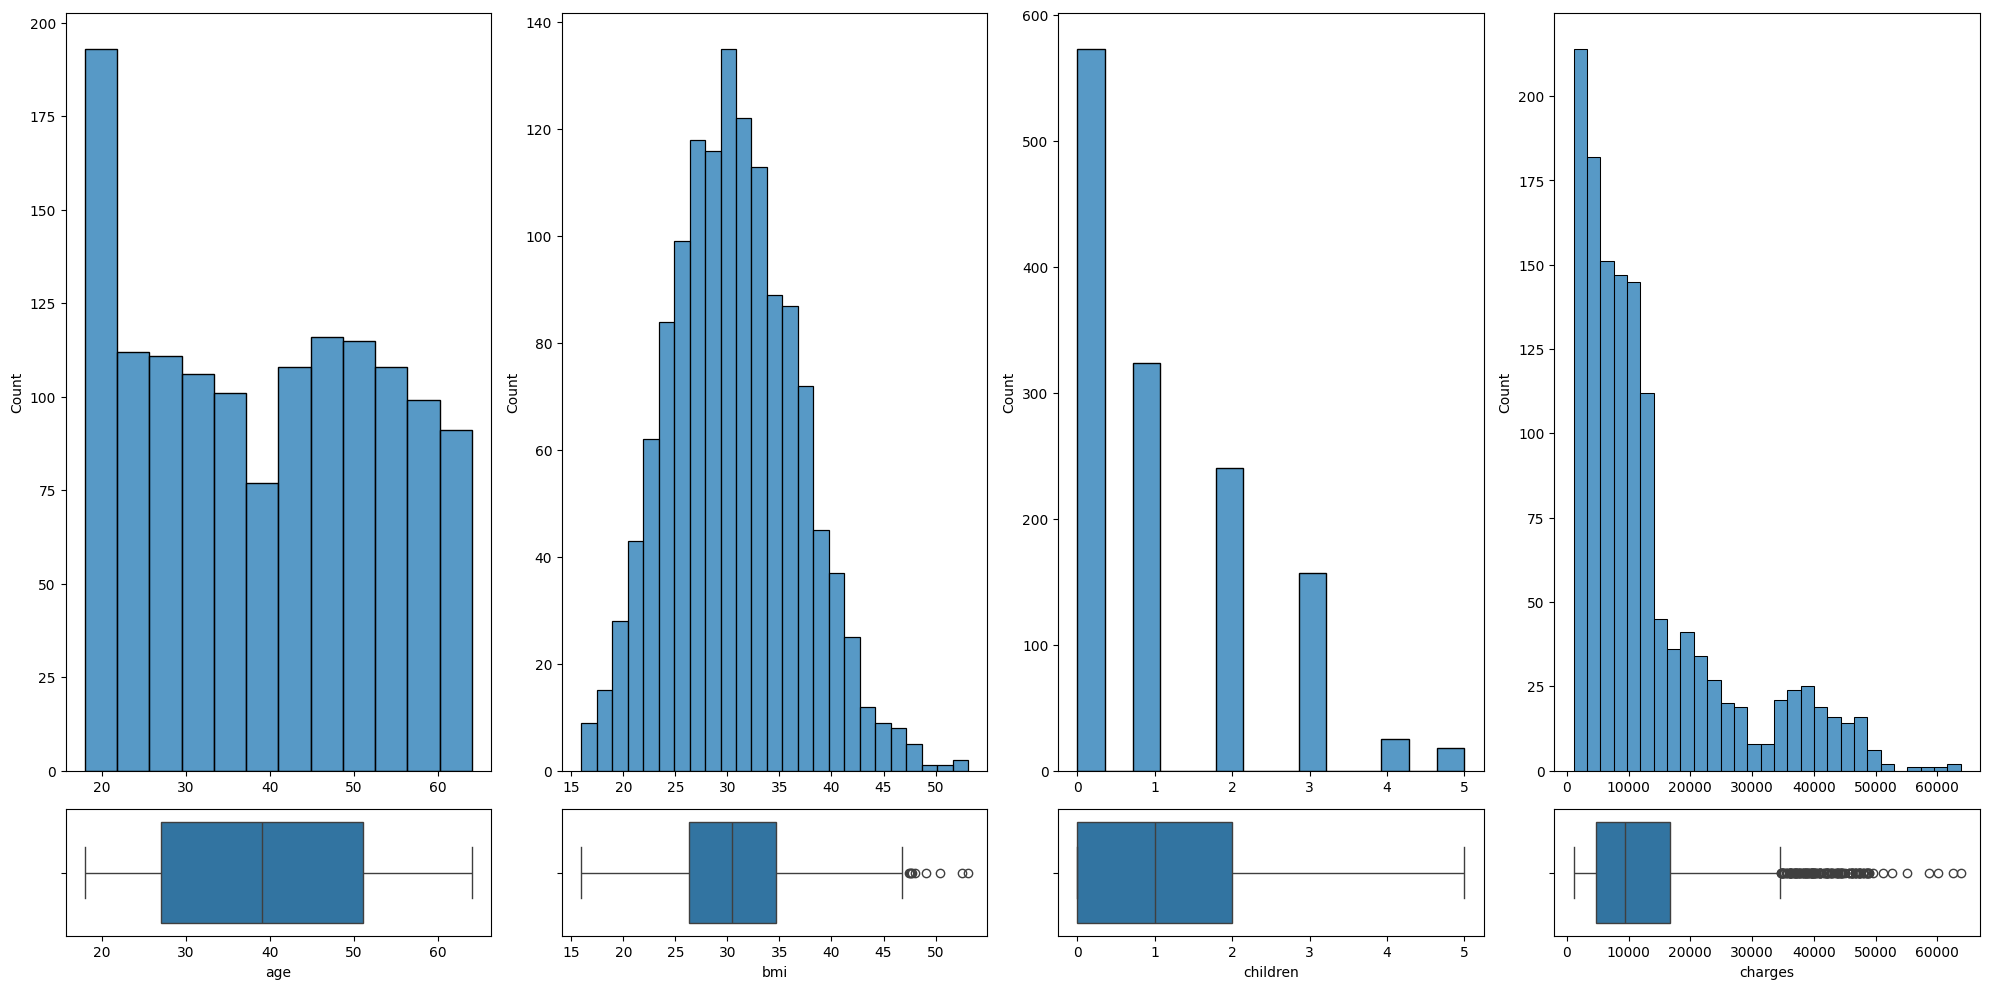

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with a 2xN grid layout (N = number of numerical variables)
fig, axis = plt.subplots(2, 4, figsize=(20, 10), gridspec_kw={'height_ratios': [6, 1]})

# List of numerical variables
numerical_vars = ["age", "bmi", "children", "charges"]

# Plot each numerical variable with a histogram and a box plot
for i, var in enumerate(numerical_vars):
    sns.histplot(ax=axis[0, i], data=data_no_duplicates, x=var).set(xlabel=None)
    sns.boxplot(ax=axis[1, i], data=data_no_duplicates, x=var)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- More abundant 20's than other ages, that influences the 'chilren variable'.
- Normal distribution curve in bmi variable.
- Negative correlation in between age and children (as expected).
- More abundant lower charges than higher. It is expected to happen more minor injuries or health problems than serious ones.

**Analysis of multivariate variables:**

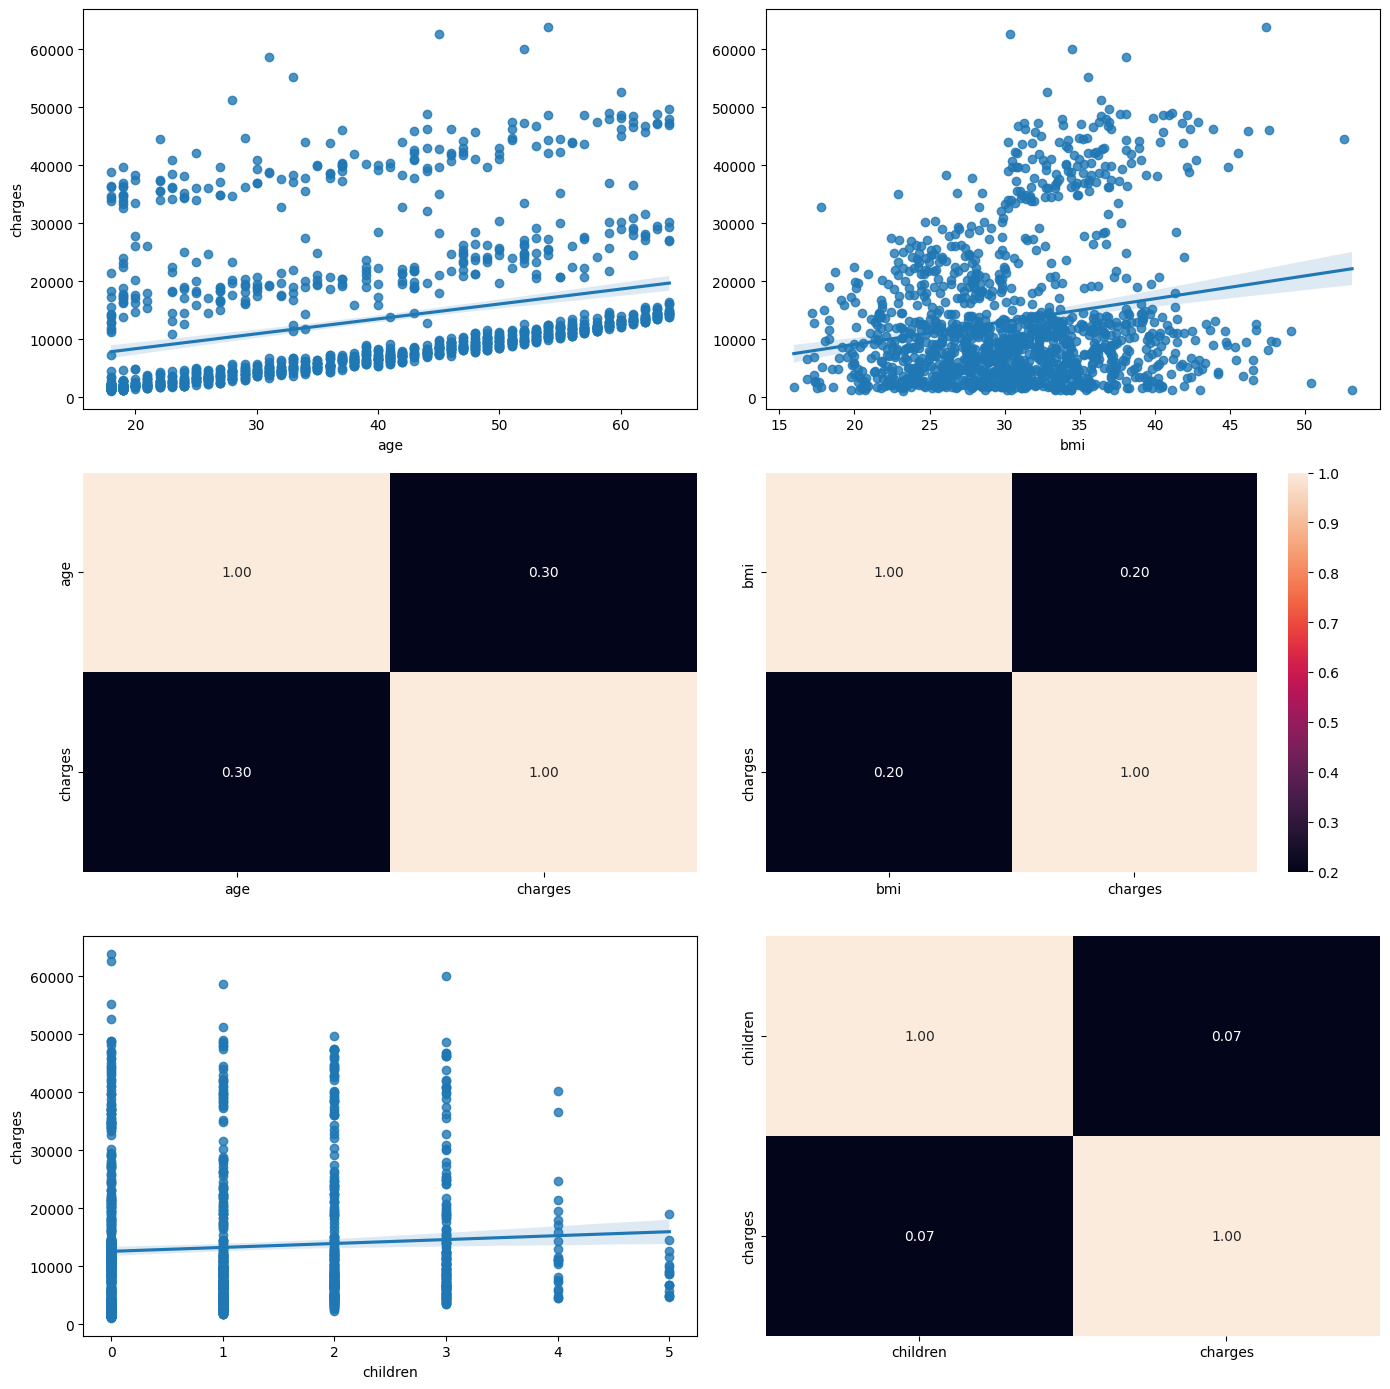

In [186]:
# Set up the figures for plotting numerical variables:

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 2, figsize=(14, 14))

# Plotting numerical variables with regression plots and correlation heatmaps:
sns.regplot(ax=axis[0, 0], data=data_no_duplicates, x="age", y="charges")
sns.heatmap(data_no_duplicates[["age", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=data_no_duplicates, x="bmi", y="charges").set(ylabel=None)
sns.heatmap(data_no_duplicates[["bmi", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.regplot(ax=axis[2, 0], data=data_no_duplicates, x="children", y="charges")
sns.heatmap(data_no_duplicates[["children", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Conclusions for Numerical Variables:

- age vs charges: The scatter plot and correlation heatmap suggest that as age increases, there is a noticeable positive trend with charges, indicating that older individuals tend to have higher insurance charges.

- bmi vs charges: There is a strong positive correlation between BMI and charges, showing that higher BMI often leads to increased medical charges, which aligns with medical expectations.

- children vs charges: This variable shows a slight positive correlation with charges, suggesting that having more children could marginally increase medical expenses.

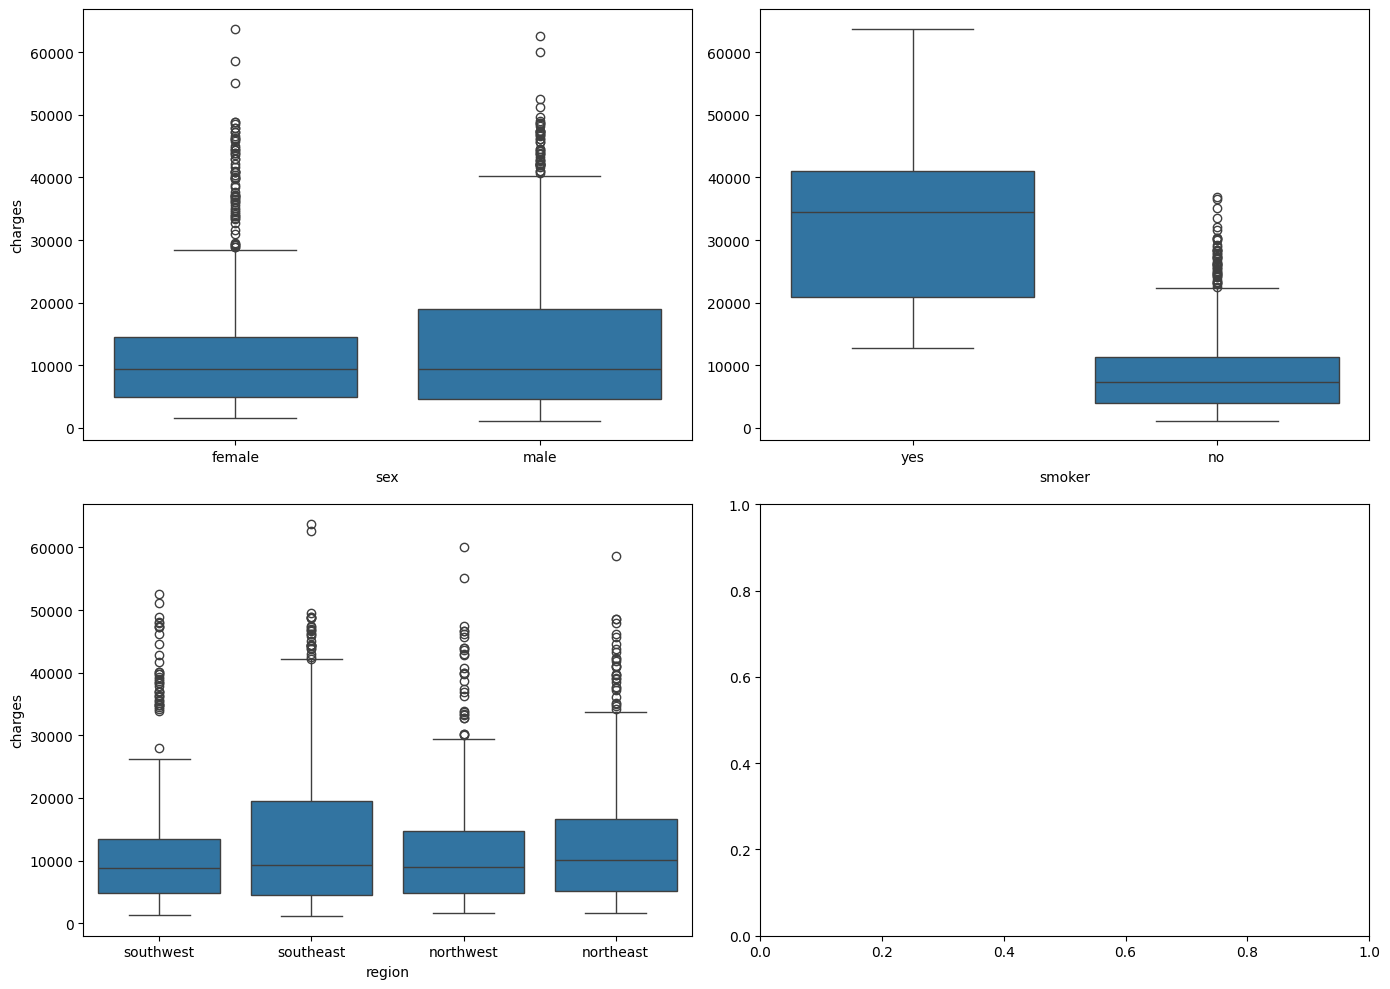

In [187]:
# Set up the figures for plotting categorical variables:

fig, axis = plt.subplots(2, 2, figsize=(14, 10))

# Boxplots for categorical variables
sns.boxplot(ax=axis[0, 0], data=data_no_duplicates, x="sex", y="charges")
sns.boxplot(ax=axis[0, 1], data=data_no_duplicates, x="smoker", y="charges").set(ylabel=None)
sns.boxplot(ax=axis[1, 0], data=data_no_duplicates, x="region", y="charges")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Conclusions for Categorical Variables:

- sex vs. charges: The distribution of charges does not differ significantly between males and females, implying gender alone may not be a strong predictor for charges.

- smoker vs. charges: There is a substantial difference between smokers and non-smokers, with smokers having much higher charges on average. This aligns with the expectation that smoking increases health risks and, consequently, medical costs.

- region vs. charges: Charges appear fairly consistent across different regions, indicating that location may not heavily influence insurance charges.

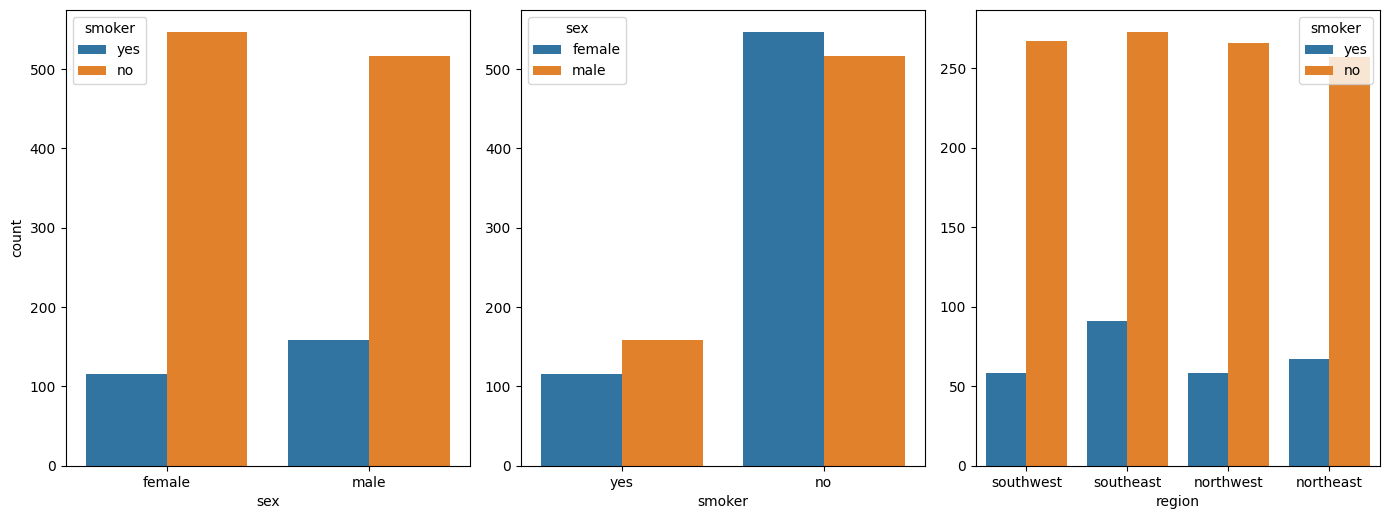

In [188]:
# Set up the figure for plotting categorical variables against charges:

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(14, 10))

# Plotting categorical variables using countplots
sns.countplot(ax=axis[0, 0], data=data_no_duplicates, x="sex", hue="smoker")
sns.countplot(ax=axis[0, 1], data=data_no_duplicates, x="smoker", hue="sex").set(ylabel=None)
sns.countplot(ax=axis[0, 2], data=data_no_duplicates, x="region", hue="smoker").set(ylabel=None)

# Remove the empty subplots in the second row
fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])
fig.delaxes(axis[1, 2])

# Adjust the layout to ensure no overlap
plt.tight_layout()

# Show the plot
plt.show()

Now will factorice our categorical variables to be able to compare them:

In [189]:
# Factorizing the categorical variables
data_no_duplicates["sex_n"] = pd.factorize(data_no_duplicates["sex"])[0]
data_no_duplicates["smoker_n"] = pd.factorize(data_no_duplicates["smoker"])[0]
data_no_duplicates["region_n"] = pd.factorize(data_no_duplicates["region"])[0]



data_no_duplicates.head(5)


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


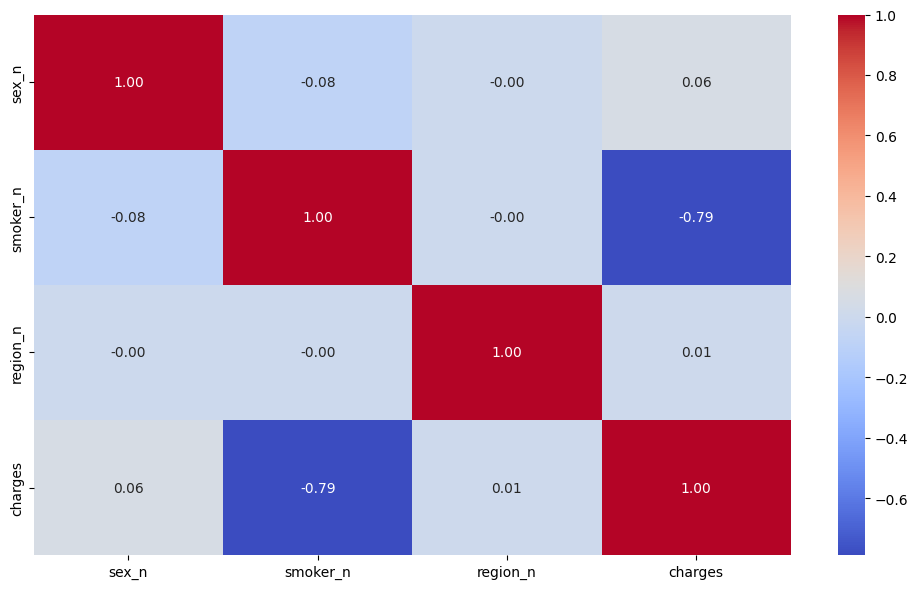

In [190]:
# Plotting the correlation heatmap
fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(data_no_duplicates[["sex_n", "smoker_n", "region_n", "charges"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.tight_layout()
plt.show()

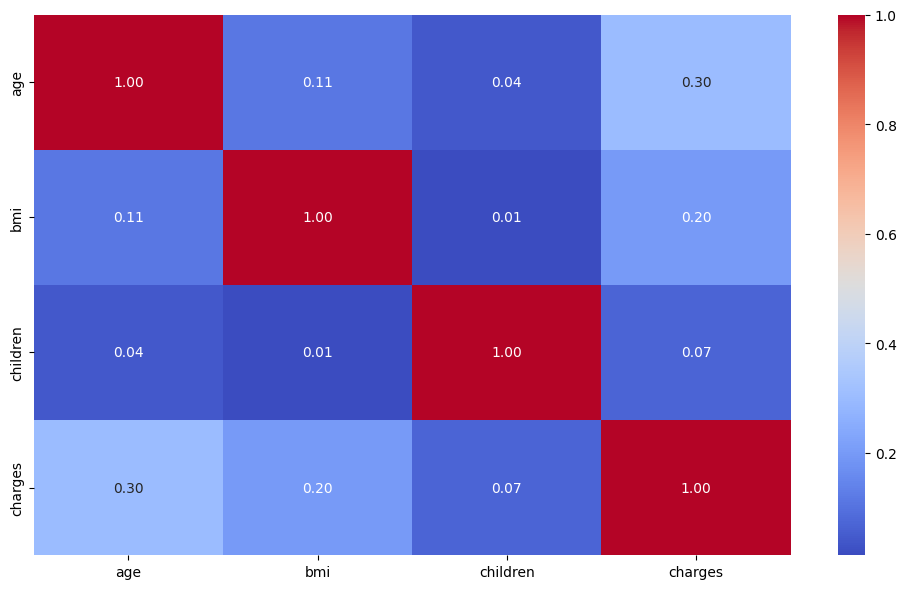

In [191]:
# List of numerical variables in your dataset
numerical_vars = ["age", "bmi", "children", "charges"]

# Plotting the correlation heatmap for numerical variables
fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(data_no_duplicates[numerical_vars].corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.tight_layout()
plt.show()

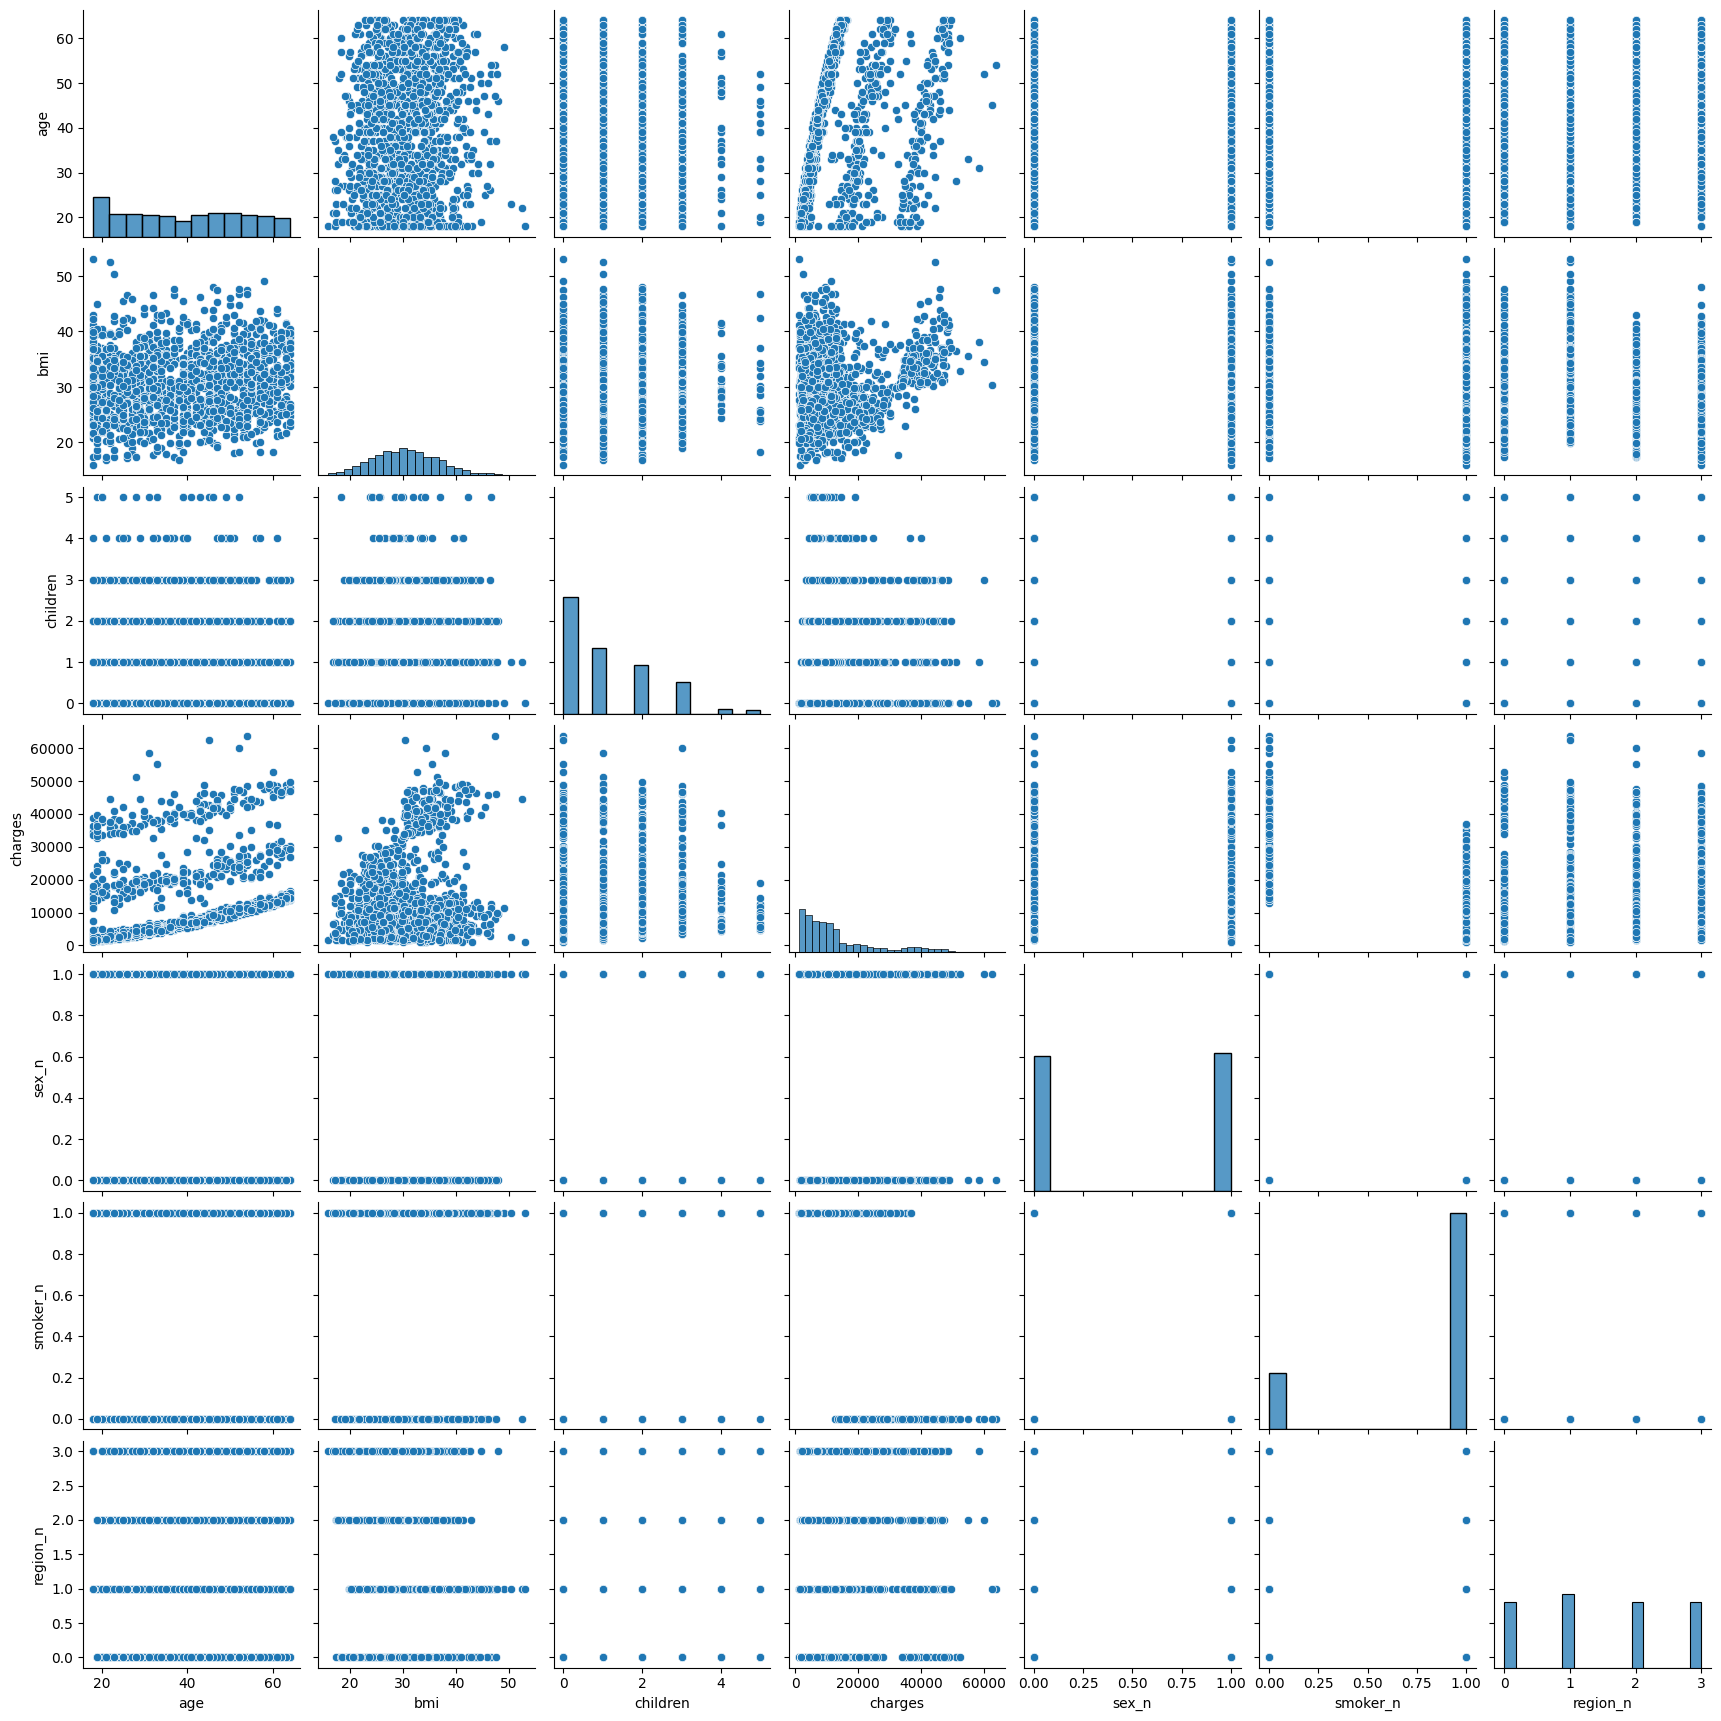

In [192]:
sns.pairplot(data = data_no_duplicates)

We undertand now the relationships in between all the variables and dependence with "charges".

In [193]:
data_no_duplicates.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


All looks fairly normal, and no signs of big outliers.

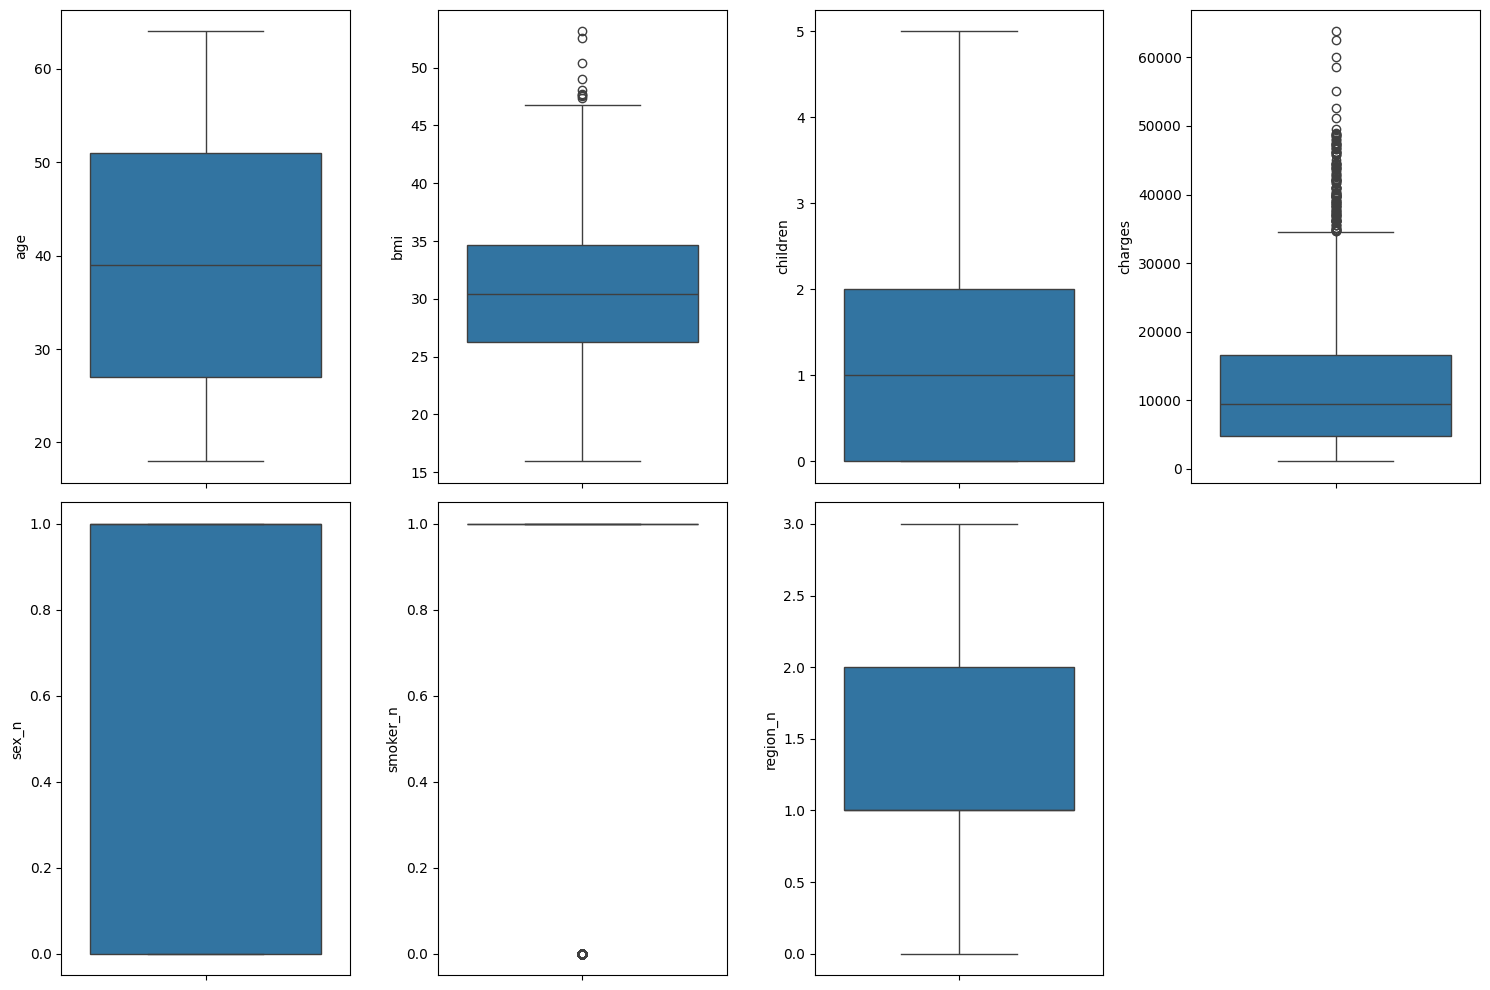

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x4 grid for plotting since we have 7 variables
fig, axis = plt.subplots(2, 4, figsize=(15, 10))

# Plotting box plots for each numerical variable
sns.boxplot(ax=axis[0, 0], data=data_no_duplicates, y="age")
sns.boxplot(ax=axis[0, 1], data=data_no_duplicates, y="bmi")
sns.boxplot(ax=axis[0, 2], data=data_no_duplicates, y="children")
sns.boxplot(ax=axis[0, 3], data=data_no_duplicates, y="charges")
sns.boxplot(ax=axis[1, 0], data=data_no_duplicates, y="sex_n")
sns.boxplot(ax=axis[1, 1], data=data_no_duplicates, y="smoker_n")
sns.boxplot(ax=axis[1, 2], data=data_no_duplicates, y="region_n")

# Remove the last empty subplot
fig.delaxes(axis[1, 3])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [195]:
# Final check looking for outliers
 
# Calculate the statistics for the 'charges' variable
charges_stats = data_no_duplicates["charges"].describe()

# Calculate the IQR for the 'charges' variable
charges_iqr = charges_stats["75%"] - charges_stats["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = charges_stats["75%"] + 1.5 * charges_iqr
lower_limit = charges_stats["25%"] - 1.5 * charges_iqr

# Print the results
print(f"The upper and lower limits for finding outliers in 'charges' are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(charges_iqr, 2)}")

The upper and lower limits for finding outliers in 'charges' are 34524.78 and -13120.72, with an interquartile range of 11911.37


In [196]:
high_charges = data_no_duplicates[data_no_duplicates["charges"] >= 34524.78]

high_charges

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
14,27,male,42.130,0,yes,southeast,39611.75770,1,0,1
19,30,male,35.300,0,yes,southwest,36837.46700,1,0,0
23,34,female,31.920,1,yes,northeast,37701.87680,0,0,3
29,31,male,36.300,2,yes,southwest,38711.00000,1,0,0
30,22,male,35.600,0,yes,southwest,35585.57600,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1299,45,male,30.360,0,yes,southeast,62592.87309,1,0,1
1300,62,male,30.875,3,yes,northwest,46718.16325,1,0,2
1302,43,male,27.800,0,yes,southwest,37829.72420,1,0,0
1312,19,female,34.700,2,yes,southwest,36397.57600,0,0,0


We shouldn't eliminate these high values because is a considerable % of the dataset.

Let's do an extream outlier measurement:


In [197]:
# Calculate the statistics for the 'charges' variable
charges_stats = data_no_duplicates["charges"].describe()

# Calculate the IQR for the 'charges' variable
charges_iqr = charges_stats["75%"] - charges_stats["25%"]

# Calculate the extreme upper and lower limits for outliers (using a multiplier of 3)
upper_limit = charges_stats["75%"] + 3 * charges_iqr
lower_limit = charges_stats["25%"] - 3 * charges_iqr

# Print the results
print(f"The upper and lower limits for finding extreme outliers in 'charges' are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(charges_iqr, 2)}")

The upper and lower limits for finding extreme outliers in 'charges' are 52391.84 and -30987.78, with an interquartile range of 11911.37


In [198]:
extream_charges = data_no_duplicates[data_no_duplicates["charges"] >= 52391.84]

extream_charges

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
543,54,female,47.410,0,yes,southeast,63770.42801,0,0,1
577,31,female,38.095,1,yes,northeast,58571.07448,0,0,3
818,33,female,35.530,0,yes,northwest,55135.40209,0,0,2
1145,60,male,32.800,0,yes,southwest,52590.82939,1,0,0
1229,52,male,34.485,3,yes,northwest,60021.39897,1,0,2
1299,45,male,30.360,0,yes,southeast,62592.87309,1,0,1


This method worked well, as reduced the number of outliers to barely 6 values.
Will drope these to imprve the accuracy of the regression model:

In [199]:
# Upper and lower limits for extreme outliers:
lower_limit = -30987.78
upper_limit = 52391.84

# Dropping rows where 'charges' are outside the extreme outlier limits:
data_no_duplicates_cleaned = data_no_duplicates[(data_no_duplicates["charges"] >= lower_limit) & 
                                                 (data_no_duplicates["charges"] <= upper_limit)]

# Check how many rows were removed
print(f"Original dataset shape: {data_no_duplicates.shape}")
print(f"New dataset shape after dropping outliers: {data_no_duplicates_cleaned.shape}")

Original dataset shape: (1337, 10)
New dataset shape after dropping outliers: (1331, 10)


Missing values: No missing values!

In [200]:
data_no_duplicates_cleaned.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

Feature scaling:



**In most cases, we should never scale the target variable,** The main reason is that we want the model's predictions to be on the same scale as your original target values, as the goal is to predict these original values.

However, In some regression problems, if the target variable has a very large range compared to prediction variables, scaling the target can improve the performance of the model. As in our case of study, **if the target has very large numbers (e.g., charges), it might be beneficial to scale it.**

Therefore, for this particular study, I will scale the prediction variable too and observe the results:

In [201]:
from sklearn.preprocessing import MinMaxScaler

# Updated list of numerical variables:
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()

scal_features = scaler.fit_transform(data_no_duplicates_cleaned[num_variables])

data_no_duplicates_cleaned_scaled = pd.DataFrame(scal_features, index = data_no_duplicates_cleaned.index, columns = num_variables)

data_no_duplicates_cleaned_scaled.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.314803
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.012056
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.066455
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.416646
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.054820


Training and Test selection: As suggested in literature will do a **80 % training, 20% test split.**

In [202]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = data_no_duplicates_cleaned_scaled.drop("charges", axis = 1)
Y = data_no_duplicates_cleaned_scaled["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Selecting the best variables for the model: At the moment, will select 4 to include smoking_n
# As we haven't seen a lot of dependency in between sex_n and charges:

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

# Apply feature selection to the training and testing datasets after fitting the SelectKBest model:

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,0.347826,0.383374,0.2,0.0
1,0.565217,0.253027,0.2,1.0
2,0.326087,0.288808,0.0,1.0
3,0.978261,0.686306,0.0,1.0
4,0.934783,0.439602,0.4,1.0


In [203]:
X_test_sel.head()

,age,bmi,children,smoker_n
0,0.847826,0.063896,0.0,1.0
1,0.195652,0.805488,0.4,1.0
2,0.152174,0.704062,0.2,1.0
3,0.630435,0.254237,0.2,0.0
4,0.195652,0.462604,0.4,1.0


Preparation and save of both datasets training and testing for further analysis and modeling.

This step is very convenient to work with a dataset that includes both the predictors and the target, and they facilitate future training or evaluation by storing the data in an easily accessible format:

In [204]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

**Application of the Linear Regression Model**

In [205]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.347826,0.383374,0.2,0.0,0.855197
1,0.565217,0.253027,0.2,1.0,0.127737
2,0.326087,0.288808,0.0,1.0,0.068891
3,0.978261,0.686306,0.0,1.0,0.245314
4,0.934783,0.439602,0.4,1.0,0.259578


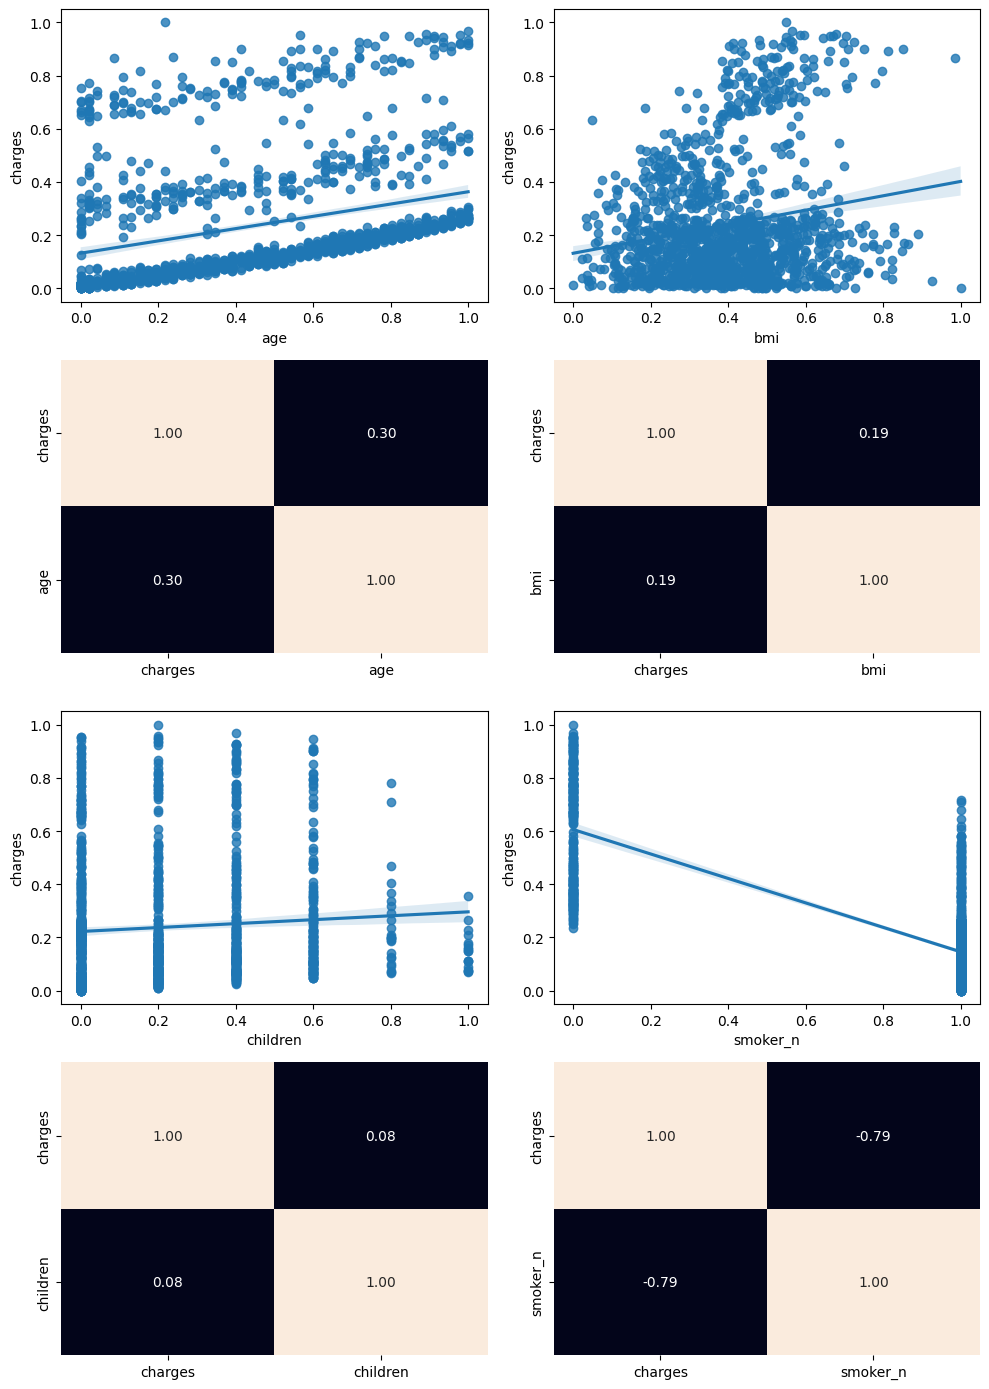

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
data_no_duplicates_cleaned_scaled = pd.concat([train_data, test_data])

sns.regplot(data = data_no_duplicates_cleaned_scaled, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(data_no_duplicates_cleaned_scaled[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = data_no_duplicates_cleaned_scaled, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(data_no_duplicates_cleaned_scaled[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = data_no_duplicates_cleaned_scaled, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(data_no_duplicates_cleaned_scaled[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = data_no_duplicates_cleaned_scaled, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(data_no_duplicates_cleaned_scaled[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [207]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [208]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Interpretation:  y = a + bx

a: The intercept is the point where the regression line crosses the y-axis when all the predictor variables are zero.

b: The coefficients represent the weight or importance of each feature in the model. Mathematically is the slope of the line.

In [209]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.4034247345365642
Coefficients (b1, b2): [ 0.22916997  0.21030957  0.05939272 -0.45745186]


Model Evaluation:

In [210]:
y_pred = model.predict(X_test)
y_pred

array([ 1.53707017e-01,  1.83969463e-01,  1.40796175e-01,  6.13248533e-01,
        1.11857668e-01,  9.21120422e-02,  8.67766907e-02,  1.75695745e-01,
        2.59784340e-01,  6.13163198e-01,  1.40360772e-01,  1.97352651e-01,
        3.09464859e-01,  1.70673533e-01,  6.42428743e-01,  3.15453761e-01,
        6.52612221e-01,  6.13839288e-01,  2.30112234e-01,  8.97721026e-02,
        1.90343379e-01,  1.30888046e-02,  6.58802944e-02, -9.91115199e-03,
        1.38024674e-01,  8.46535048e-02,  1.02373259e-01,  5.95077850e-02,
        1.79664062e-01,  6.52876440e-01,  7.42038498e-02,  1.34132589e-01,
        2.25458724e-01,  5.53063248e-01,  2.05950444e-01,  2.73074997e-01,
        8.18652538e-02,  2.26704436e-01,  2.27405463e-01,  2.19925818e-01,
        1.00816806e-01,  5.01934189e-01,  1.86247047e-01,  8.54283660e-02,
        6.16827925e-02,  1.25754864e-01,  6.42284361e-02,  5.46597744e-01,
        6.41099889e-02,  4.86826730e-01,  2.46101488e-01,  2.53443499e-01,
        1.51199282e-01,  

In [211]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", R2)

Mean Squared Error: 0.012500167509316614
R2 Score: 0.795637824933981


# CONCLUSIONS:

**mse:** The MSE obtained is approximately **0.0125**. This suggests that the average squared deviation between the predicted and actual charges values is low, indicating a reasonably good fit. However, whether this is "good" depends on the scale of the charges variable. If charges is large compared to this error, the model is performing well; otherwise, further improvement might be needed.

**R2:** Our score is approximately **0.796**. this means that about 79.6% of the variance in the charges variable is explained by your model. This is a solid result, indicating the model is capturing a significant amount of the underlying pattern. However, there is still room for improvement, as 20.4% of the variance is not explained by the current model.


The model COULD BE OPTIMISED, but I would need to discuse it with the teachers board for better understanding.